# Part 2: Machine Learning: Credit Approval Data

In this Jupyter notebook we train, test, and evaluate the performance of different classifiers in predicting credit card approval.

We use the Australian Credit Approval Dataset hosted on the UC Irvine Machine Learning Repository to conduct this investigation in the performance of different classifiers in predicting credit card approval.

For this dataset there are 690 examples; all categorical values are replaced by numerical values for privacy reasons. The credict card approval information in the last column which is the label vector is encoded as 0 for "not approved" and +1 for "approved". The remaining  columns contain the features of the data.

We utilise scikit-learn, pandas, and seaborn in the analysis, visualisation, and extrapolation of this data.

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
import time
from sklearn.metrics import classification_report

In [2]:
# read the asutralian.csv file to a dataframe
australian = pd.read_csv("australian.csv") 

In [3]:
# verify that this is of pandas dataframe data type
print(type(australian))

<class 'pandas.core.frame.DataFrame'>


In [4]:
# print top 5 rows of dataframe
australian.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


Having a quick look at https://archive-beta.ics.uci.edu/dataset/143/statlog+australian+credit+approval,

The characteristics of the data set are:
- `x0` Categorical [0,1]
- `x1` Continuous
- `x2` Continuous
- `x3` Categorical [1, 2, 3]
- `x4` Categorical [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
- `x5` Categorical [1, 2, 3, 4, 5, 6, 7, 8, 9]
- `x6` Continuous
- `x7` Categorical [0, 1]
- `x8` Categorical [0, 1]
- `x9` Continuous
- `x10` Categorical [0, 1]
- `x11` Categorical [1, 2, 3]
- `x12` Continuous
- `x13` Continuous
- `y` Class Attribute [0, 1]

In [5]:
# produce summary of data
australian.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


Note that x12 and x13 have strange max values compared to their own mean values

In [6]:
#look for null values in dataframe
australian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      690 non-null    int64  
 1   x1      690 non-null    float64
 2   x2      690 non-null    float64
 3   x3      690 non-null    int64  
 4   x4      690 non-null    int64  
 5   x5      690 non-null    int64  
 6   x6      690 non-null    float64
 7   x7      690 non-null    int64  
 8   x8      690 non-null    int64  
 9   x9      690 non-null    int64  
 10  x10     690 non-null    int64  
 11  x11     690 non-null    int64  
 12  x12     690 non-null    int64  
 13  x13     690 non-null    int64  
 14  y       690 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 81.0 KB


No null values in this data set as implied by the following plot:

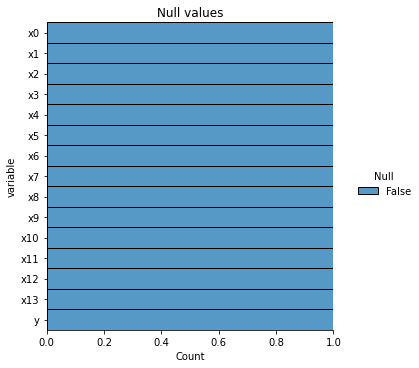

In [7]:
sns.displot(data=australian.isna().melt(value_name="Null"), y='variable', hue='Null', multiple="fill", aspect=1)
plt.title("Null values")
plt.show()

Next we try to visually interpret the possible relationships present in the features. We shall plot the relationships between each variable where blue represents classifications of 0 and orange represents classifications of 1.

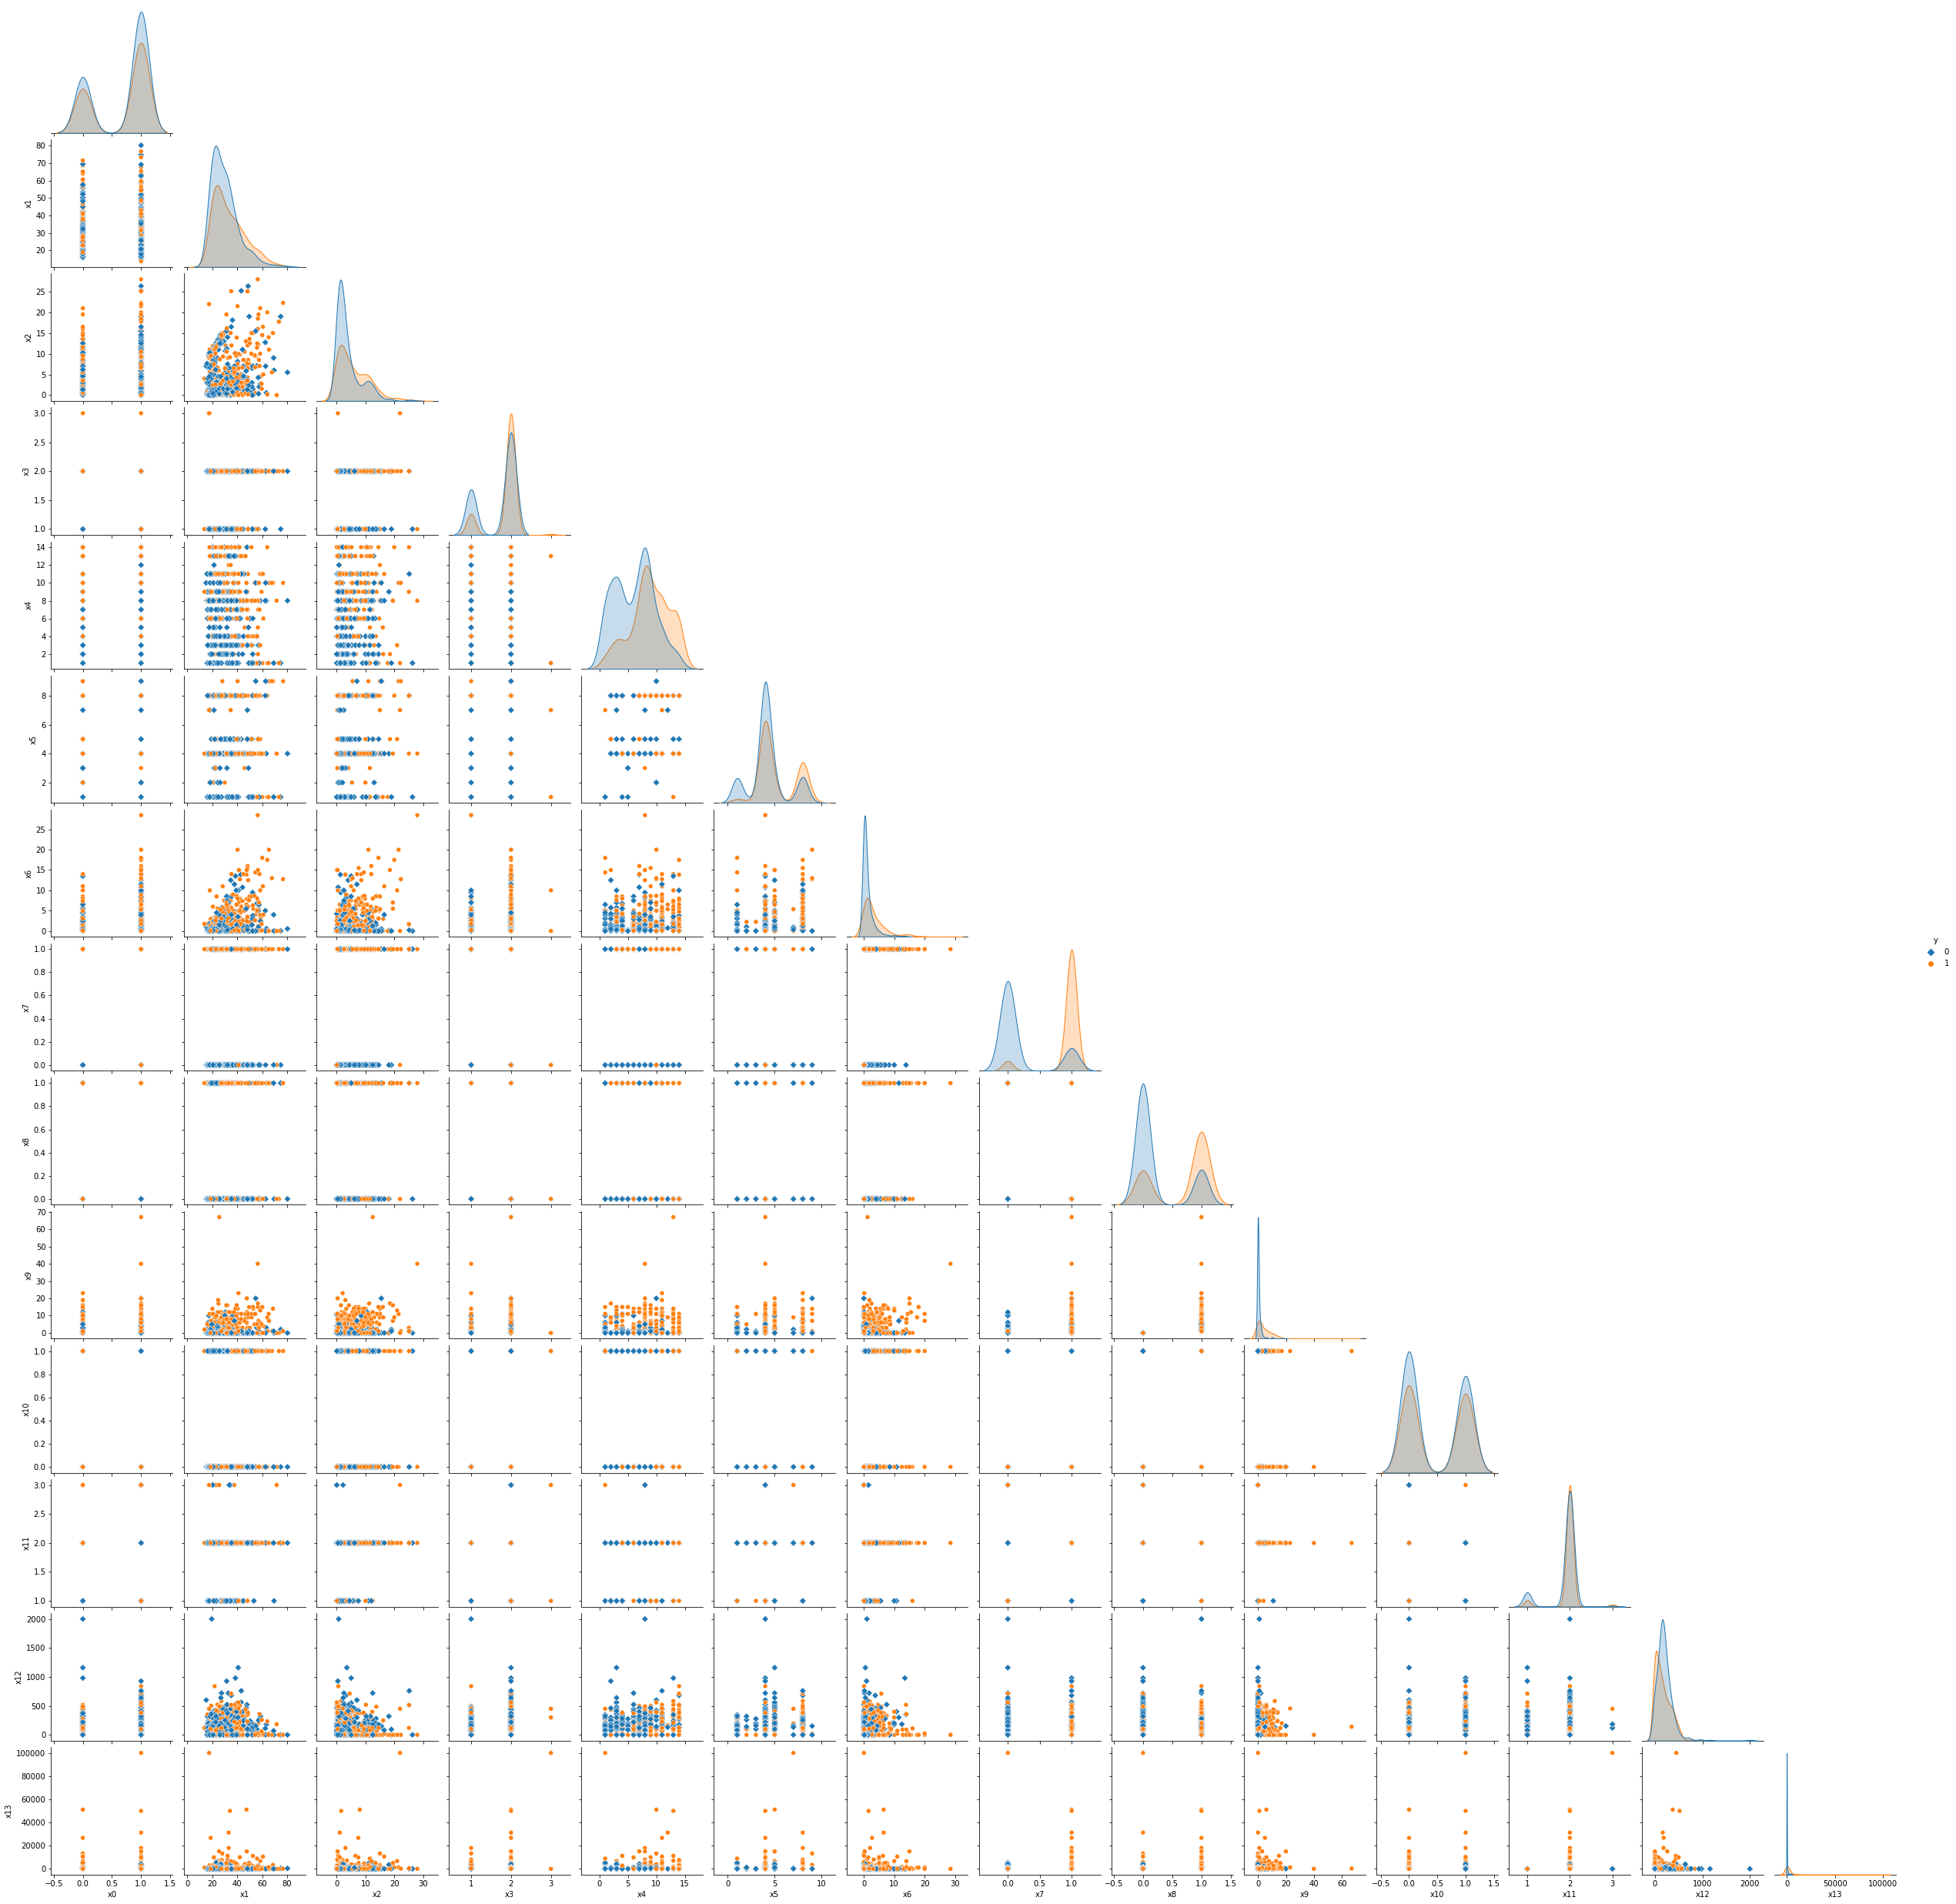

In [8]:
sns.pairplot(australian, hue='y', corner=True, markers=["D", "o"])
plt.show()

Above are plots of each variable against another variable which give a grid of pairwise relationships in this dataset. These include pdfs for the possible cases of y (0 or 1 which stand for "not approved" or "approved").

x7 appears to have strong relationships with x1, x2, and x6 and this should be investigated further.

Below we investigate the relationship between the values of each feature against whether they have been classified as 0 ("not approved") or 1 ("approved").

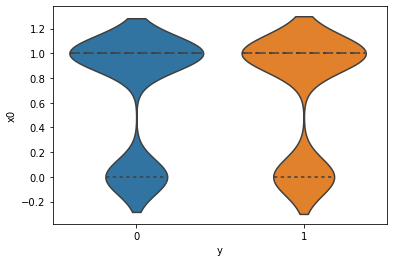

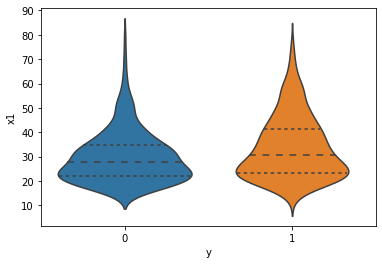

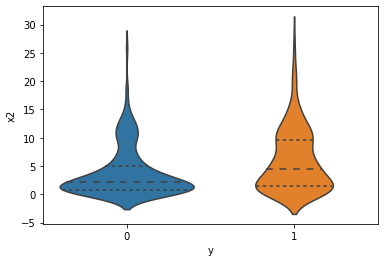

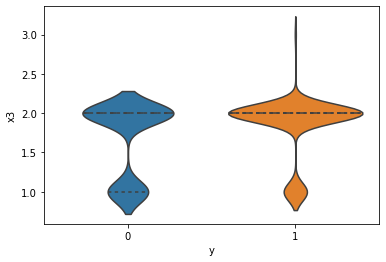

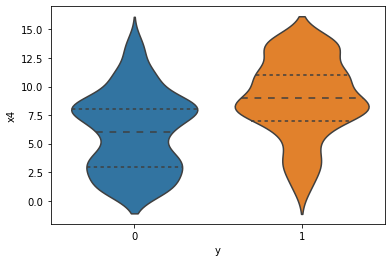

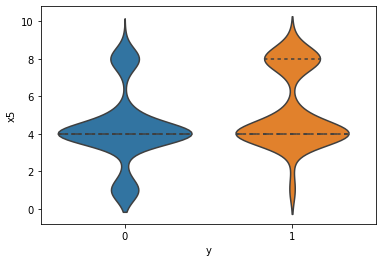

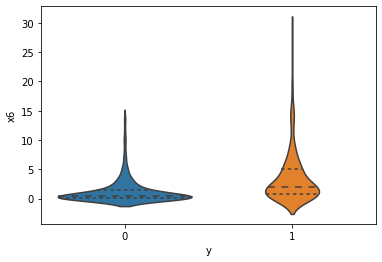

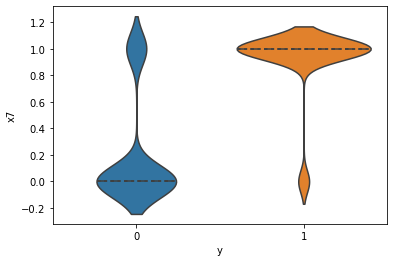

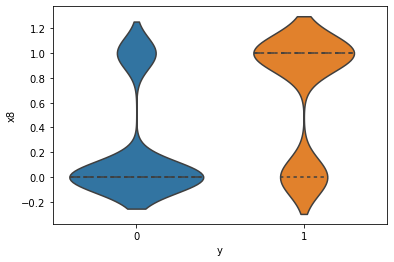

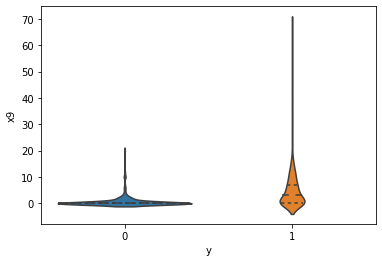

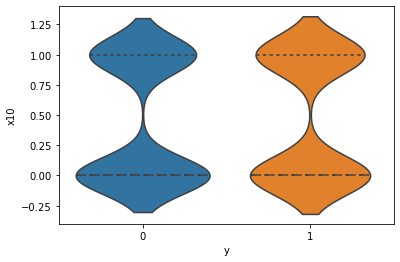

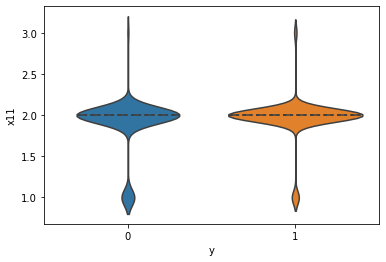

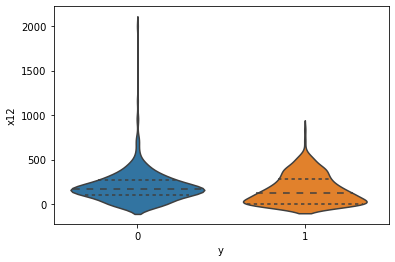

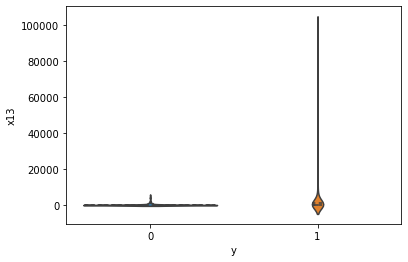

In [9]:
g = sns.violinplot(x='y', y='x0', data=australian, inner='quartile')
plt.show()
g = sns.violinplot(x='y', y='x1', data=australian, inner='quartile')
plt.show()
g = sns.violinplot(x='y', y='x2', data=australian, inner='quartile')
plt.show()
g = sns.violinplot(x='y', y='x3', data=australian, inner='quartile')
plt.show()
g = sns.violinplot(x='y', y='x4', data=australian, inner='quartile')
plt.show()
g = sns.violinplot(x='y', y='x5', data=australian, inner='quartile')
plt.show()
g = sns.violinplot(x='y', y='x6', data=australian, inner='quartile')
plt.show()
g = sns.violinplot(x='y', y='x7', data=australian, inner='quartile')
plt.show()
g = sns.violinplot(x='y', y='x8', data=australian, inner='quartile')
plt.show()
g = sns.violinplot(x='y', y='x9', data=australian, inner='quartile')
plt.show()
g = sns.violinplot(x='y', y='x10', data=australian, inner='quartile')
plt.show()
g = sns.violinplot(x='y', y='x11', data=australian, inner='quartile')
plt.show()
g = sns.violinplot(x='y', y='x12', data=australian, inner='quartile')
plt.show()
g = sns.violinplot(x='y', y='x13', data=australian, inner='quartile')
plt.show()

Above we plot violin plots for each x over y where we see in particular that the plots for x12 and x13 have very long tails due to having very large maximum values which are significantly larger than the mean value.

We notice that for x7, most of the values which were approved were 1.0 while most of the values that were not approved were 0.0, hinting to the suggestion that x7 may be an important feature. We can also see the same for x8 to a smaller degree.

Most other values excluding x7 and x8 are almost exactly symmetric when noticing the shapes of the violin plots labelled 0 and 1.

Let us consider histograms of x12 and x13 considering we have noticed some possible outliers:

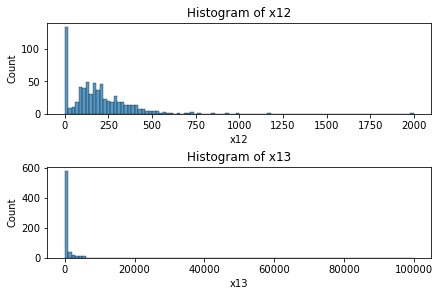

In [10]:
plt.subplots(constrained_layout=True)

plt.subplot(211)
sns.histplot(australian['x12'], bins = 100)
plt.title("Histogram of x12")

plt.subplot(212)
sns.histplot(australian['x13'], bins = 100)
plt.title("Histogram of x13")

plt.show()

It is safe to say that x12 and x13 most likely have outliers in them which should be considered in the analysis of this data set as evidenced from this histogram

# Data Processing

- We seperate the australian dataframe into a design matrix *X* and label vector *y*
- We split the dataset into train and test sub-sets using a test dataset size of 33% of the total dataset
- We then perform sensible scaling

In [11]:
# Set up the design matrix and label vector and analyze their properties
X = australian.drop(['y'], axis=1)
y = australian['y']
print(type(X))
print(type(y))
print(X.shape)
print(y.shape)
print(X.head())
print(y.head())

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(690, 14)
(690,)
   x0     x1     x2  x3  x4  x5     x6  x7  x8  x9  x10  x11  x12   x13
0   1  22.08  11.46   2   4   4  1.585   0   0   0    1    2  100  1213
1   0  22.67   7.00   2   8   4  0.165   0   0   0    0    2  160     1
2   0  29.58   1.75   1   4   4  1.250   0   0   0    1    2  280     1
3   0  21.67  11.50   1   5   3  0.000   1   1  11    1    2    0     1
4   1  20.17   8.17   2   6   4  1.960   1   1  14    0    2   60   159
0    0
1    0
2    0
3    1
4    1
Name: y, dtype: int64


In [12]:
#train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# scale the data appropriately
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

We run a cross-validation score of the SVC classifier with default parameters and report the mean cross validation score. This will give a baseline score of what one can expect from a basic classifier without any tuning of hyperparameters.

In [13]:
#set the classifier
clf = svm.SVC()

score = cross_val_score(clf, X_train_scaled, y_train, cv=5)

for i in range(len(score)):
    print(i+1, "th Score:", score[i])

print("Mean Cross Validation Score:", score.mean())

1 th Score: 0.8817204301075269
2 th Score: 0.8709677419354839
3 th Score: 0.8913043478260869
4 th Score: 0.8152173913043478
5 th Score: 0.8804347826086957
Mean Cross Validation Score: 0.8679289387564282


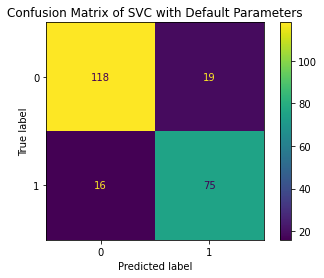

In [14]:
#train model
clf.fit(X_train_scaled, y_train)
#predict the value of y for any unseen example
y_pred = clf.predict(X_test_scaled)

#set up confusion matrix with colours and labels
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.title("Confusion Matrix of SVC with Default Parameters")
plt.show()

We note that with default parameters there are 19 false positives and 16 false negatives. This is important as incorrectly predicting "approved" can make a big impact as we are working with credit approval data; so the precision of predicting 1 and the recall of  predicting 0 must be taken into account.

In [15]:
# set the classifier
clf = svm.SVC()

# Train the model, aka learn from the data
clf.fit(X_train_scaled, y_train)

# print classifier score. Here we print the score for both the test and training data
print("The SVC classifier score on the test data is", 
      round(clf.score(X_test_scaled, y_test),4))
print("The SVC classifier score on the training data is", 
      round(clf.score(X_train_scaled, y_train),4))

The SVC classifier score on the test data is 0.8465
The SVC classifier score on the training data is 0.9156


In [16]:
score_default_train = round(clf.score(X_train_scaled, y_train), 4)
score_default_test = round(clf.score(X_test_scaled, y_test), 4)

# Hyperparameter Tuning

We tune hyperparameters via tuning regularisation parameter C for the linear kernel and C and the scale parameter gamma
for the rbf kernel. Let us start with the linear kernel.

In [17]:
# set the parameters for linear
svc = svm.SVC()

# set the grid
C_vals = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

score_mean = []
score_std = []

for C_val in C_vals:
    # set the classifier with the corresponding hyperparameter
    svc = svm.SVC(kernel = 'linear', C=C_val)
    # This the cross-validation. It is the important and expensive part of the code.
    scores = cross_val_score(svc, X_train_scaled, y_train)  
    # record the mean and std of the score
    score_mean.append(scores.mean())
    score_std.append(scores.std())

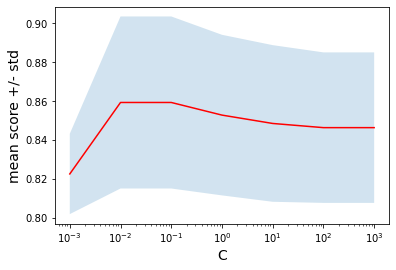

In [18]:
# plot the scores as function of hyperparameter
# we first convert our mean and std list to np.arrays
score_mean = np.array(score_mean)
score_std = np.array(score_std)

plt.semilogx(C_vals, score_mean,'r')
plt.fill_between(C_vals, score_mean-score_std, score_mean+score_std, alpha=0.2)
plt.xlabel("C", fontsize="14")
plt.ylabel("mean score +/- std", fontsize="14")
plt.show()

From this graph we see a peak at C = 0.01 and hence that seems to be its optimal value

In [19]:
# Compute the optimal value with the given parameters to make sure it agrees with our previous plot and output mean cross validated score
tuned_parameters = [{"kernel": ["linear"], "C": C_vals}]

clf_linear = GridSearchCV(svc, tuned_parameters, cv=5)
clf_linear.fit(X_train_scaled, y_train)
linear_score_mean = clf_linear.cv_results_["mean_test_score"]
linear_score_std = clf_linear.cv_results_["std_test_score"]

print("Linear Hyperparameter:", clf_linear.best_params_)
print("Linear Mean_cross_validated Score of the best_estimator:", round(clf_linear.best_score_, 4))

Linear Hyperparameter: {'C': 0.01, 'kernel': 'linear'}
Linear Mean_cross_validated Score of the best_estimator: 0.8592


We now tune the hyperparameter gamma for the rbf kernel

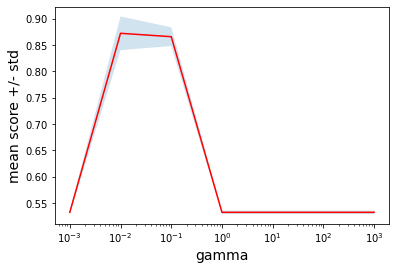

In [20]:
# set the parameters for rbf
svc = svm.SVC()

# set the grid 
g_vals = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

score_mean = []
score_std = []

for g_val in g_vals:
    # set the classifier with the corresponding hyperparameter
    svc = svm.SVC(C = 0.1, gamma=g_val)
    # This the cross-validation. It is the important and expensive part of the code.
    scores = cross_val_score(svc, X_train_scaled, y_train) 
    # record the mean and std of the score
    score_mean.append(scores.mean())
    score_std.append(scores.std())
    
# plot the scores as function of hyperparameter
# we first convert our mean and std list to np.arrays
score_mean = np.array(score_mean)
score_std = np.array(score_std)

plt.semilogx(g_vals, score_mean,'r')
plt.fill_between(g_vals, score_mean-score_std, score_mean+score_std, alpha=0.2)
plt.xlabel("gamma", fontsize="14")
plt.ylabel("mean score +/- std", fontsize="14")
plt.show()

From this graph we see a peak at gamma = 0.01 and hence that seems to be its optimal value

In [21]:
# Compute the optimal value with the given parameters to make sure it agrees with our previous plot and output mean cross validated score
tuned_parameters = [{"kernel": ["rbf"], "gamma": g_vals, "C": C_vals}]

clf_rbf = GridSearchCV(svc, tuned_parameters, cv=5)
clf_rbf.fit(X_train_scaled, y_train)
r_score_mean = clf_rbf.cv_results_["mean_test_score"]
r_score_std = clf_rbf.cv_results_["std_test_score"]

print("rbf Hyperparameter:", clf_rbf.best_params_)
print("rbf Mean_cross_validated Score of the best_estimator:", round(clf_rbf.best_score_, 4))

rbf Hyperparameter: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
rbf Mean_cross_validated Score of the best_estimator: 0.8723


We now test and compare the two classifiers

In [22]:
#set up confusion matrices using logic from notebooks from week 10

svc_rbf = clf_rbf.best_estimator_
svc_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svc_rbf.predict(X_test_scaled)

svc_linear = clf_linear.best_estimator_
svc_linear.fit(X_train_scaled, y_train)
y_pred_linear = svc_linear.predict(X_test_scaled)

cm_rbf = confusion_matrix(y_test, y_pred_rbf, labels=svc_rbf.classes_)
disp_rbf = ConfusionMatrixDisplay(confusion_matrix=cm_rbf, display_labels=svc_rbf.classes_)

score_rbf_train = round(svc_rbf.score(X_train_scaled, y_train), 4)
score_rbf_test = round(svc_rbf.score(X_test_scaled, y_test), 4)

cm_linear = confusion_matrix(y_test, y_pred_linear, labels=svc_linear.classes_)
disp_linear = ConfusionMatrixDisplay(confusion_matrix=cm_linear, display_labels=svc_linear.classes_)

score_linear_train =  round(svc_linear.score(X_train_scaled, y_train), 4)
score_linear_test = round(svc_linear.score(X_test_scaled, y_test), 4)

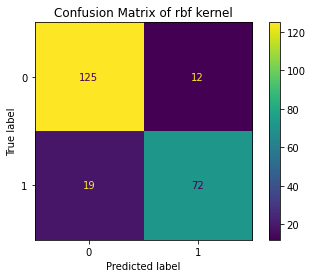

The RBF SVC classifier score on the training data is 0.8615
The RBF SVC classifier score on the test data is 0.864


In [23]:
#plot confusion matrix of rbf kernel

disp_rbf.plot()
plt.title("Confusion Matrix of rbf kernel")
plt.show()

print("The RBF SVC classifier score on the training data is", score_rbf_train)
print("The RBF SVC classifier score on the test data is", score_rbf_test)

Note that the confusion matrix of the rbf kernel showcases less false positives than that of the SVC with default parameters. There are also slightly more false negatives.

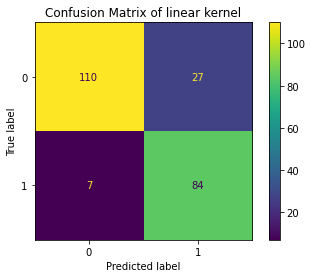

The Linear SVC classifier score on the training data is 0.8593
The Linear SVC classifier score on the test data is 0.8509


In [24]:
#plot confusion matrix of linear kernel

disp_linear.plot()
plt.title("Confusion Matrix of linear kernel")
plt.show()

print("The Linear SVC classifier score on the training data is", score_linear_train)
print("The Linear SVC classifier score on the test data is", score_linear_test)

Note that the confusion matrix of the rbf kernel showcases more false positives and less false negatives than that of the SVC with default parameters. Although we also see more true positives as well, we want to avoid as many false positives so this may not be the best classifier for credit approval data. 

Text(0.5, 1.0, 'Comparing Scores of SVC Classifiers')

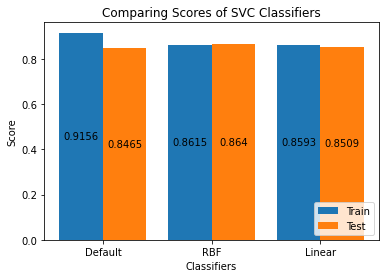

In [25]:
#plot bar charts for comparison of SVC classifiers

train_results = [score_default_train, score_rbf_train, score_linear_train]
test_results = [score_default_test, score_rbf_test, score_linear_test]

fig, ax = plt.subplots()

X_axis = np.arange(len(['Default', 'RBF', 'Linear']))

plot_train = ax.bar(X_axis-0.2, train_results, width=0.4, label = 'Train')
plot_test = ax.bar(X_axis+0.2, test_results, width=0.4, label = 'Test')

ax.bar_label(plot_train, label_type='center')
ax.bar_label(plot_test, label_type='center')
ax.set_xticks(X_axis, ['Default', 'RBF', 'Linear'])
ax.legend(loc='lower right')
ax.set_xlabel("Classifiers")
ax.set_ylabel("Score")
ax.set_title("Comparing Scores of SVC Classifiers")

We can see that RBF here is the best classifier for credit approval data as it has the least false positives out of all the SVC classifiers which is of most importance to us in this case.

# Other Classifiers

We will now consider other classifiers. These include:
- MLP
- Decision Tree
- Random Forest
- Radius Neighbors
- Gaussian Process

We will start with MLP Classifier. Here we have previous tested with a larger variety of alphas and hidden layer sizes but this has led to very long computation times and not much difference in results, so in order to save computation time we shall investigate the different parameters below and tune them including the hidden layers.

In [26]:
#Initializing the MLPClassifier
mlp = MLPClassifier(max_iter=10000)

#initialize parameters
parameters_mlp = {'hidden_layer_sizes': [(100,), (200,)], 'activation': ['tanh', 'relu'], 'solver': ['sgd', 'adam'], 'alpha': [1e-3, 1e-2], 'learning_rate': ['invscaling', 'adaptive']}

#find optimal parameters
clf_mlp = GridSearchCV(mlp, parameters_mlp, cv=5)
clf_mlp.fit(X_train_scaled, y_train)

print("MLP Hyperparameter:", clf_mlp.best_params_)
print("MLP Mean cross validated Score of the best estimator:", round(clf_mlp.best_score_, 4))

MLP Hyperparameter: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'sgd'}
MLP Mean cross validated Score of the best estimator: 0.8788


We see that the tuned hyperparameters are: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'sgd'}

Construct final MLP classifier with optimal model parameters

In [27]:
# set the classifier
mlp_final = clf_mlp.best_estimator_
mlp.fit(X_train_scaled, y_train)
mlp_y_predict_final = mlp.predict(X_test_scaled)


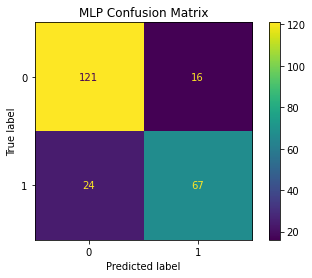

MLP training data score is: 0.9004
MLP test data score isL 0.864


In [28]:
#set up confusion matrix
cm_mlp_final = confusion_matrix(y_test, mlp_y_predict_final, labels=mlp_final.classes_)
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp_final, display_labels=mlp_final.classes_)

mlp_score_train = round(mlp_final.score(X_train_scaled, y_train), 4)
mlp_score_test = round(mlp_final.score(X_test_scaled, y_test), 4)

disp_mlp.plot()
plt.title("MLP Confusion Matrix")
plt.show()

print(f"MLP training data score is: {mlp_score_train}")
print(f"MLP test data score isL {mlp_score_test}")

In [29]:
# Produce classification report
print(classification_report(y_test, mlp_y_predict_final))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       137
           1       0.81      0.74      0.77        91

    accuracy                           0.82       228
   macro avg       0.82      0.81      0.81       228
weighted avg       0.82      0.82      0.82       228



We note the recall percentage for "approved" which is somewhat low, showcasing that we have significantly less correct positive predictions relative to total actual positives compared the rest of the data. This alongisde the confusion matrix shows that we have correctly predicted less positive predictions via MLP

Below we investigate which features are the most important in determining the classification

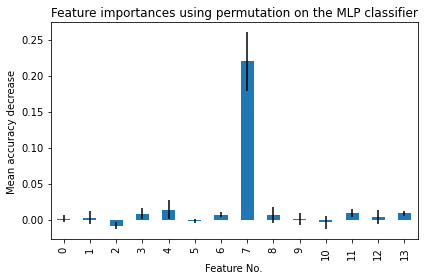

In [30]:
# Note the time taken to take into account complexity of the classifier
start_time = time.time()

result = permutation_importance(mlp_final, X_test_scaled, y_test, n_repeats=10, random_state=42, n_jobs=2)

mlp_elapsed_time = time.time() - start_time

# plot accuracy decrease against feature number to determine importance of features for this classifier

mlp_importances = pd.Series(result.importances_mean)

fig, ax = plt.subplots()
mlp_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on the MLP classifier")
ax.set_ylabel("Mean accuracy decrease")
ax.set_xlabel("Feature No.")
fig.tight_layout()
plt.show()

Here we notice in particular that feature number 7 is the most prominent in deciding whether information is "approved" or "not approved" for the MLP classifier.

# Decision Tree Classifier

In [31]:
# Initializing the DecisionTreeClassifier

DecTree = tree.DecisionTreeClassifier()

# Initialise parameters

parameters_DecTree = {'criterion':['gini','entropy'], 'splitter':['best', 'random'], 'max_depth':[4,8,12,15,20,30,40,50,70,90,120,150]}

# Find optimal parameters

clf_DecTree = GridSearchCV(DecTree, parameters_DecTree, cv=5)
clf_DecTree.fit(X_train_scaled, y_train)

print()
print("Decision Tree Hyperparameter:", clf_DecTree.best_params_)
print("Decision Tree Mean cross validated Score of the best estimator:", round(clf_DecTree.best_score_, 4))


Decision Tree Hyperparameter: {'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'}
Decision Tree Mean cross validated Score of the best estimator: 0.8702


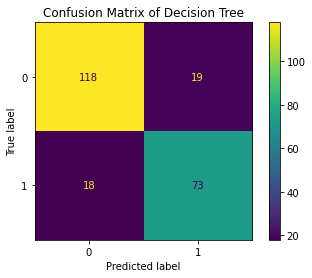

The Decision Tree classifier score on the training data is 0.8983
The Decision Tree classifier score on the test data is 0.8377


In [32]:
# Set up confusion matrix
DecTree_final = clf_DecTree.best_estimator_
DecTree_final.fit(X_train_scaled, y_train)
DecTree_y_predict_final = DecTree_final.predict(X_test_scaled)

cm_DecTree_final = confusion_matrix(y_test, DecTree_y_predict_final, labels=DecTree_final.classes_)
disp_DecTree = ConfusionMatrixDisplay(confusion_matrix=cm_DecTree_final, display_labels=DecTree_final.classes_)

DecTree_score_train = round(DecTree_final.score(X_train_scaled, y_train), 4)
DecTree_score_test = round(DecTree_final.score(X_test_scaled, y_test), 4)

disp_DecTree.plot()
plt.title("Confusion Matrix of Decision Tree")
plt.show()

print("The Decision Tree classifier score on the training data is", DecTree_score_train)
print("The Decision Tree classifier score on the test data is", DecTree_score_test)

We note that this confusion matrix is almost the same as the confusion matrix for the SVC classifier with default parameters

In [33]:
# Produce classification report
print(classification_report(y_test, DecTree_y_predict_final))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       137
           1       0.79      0.80      0.80        91

    accuracy                           0.84       228
   macro avg       0.83      0.83      0.83       228
weighted avg       0.84      0.84      0.84       228



The classification report of the Decision Tree Classifier shows somewhat high percentages of precision for "not approved" and a little lower percentages for "approved" meaning that there are slightly more false positives than false negatives.

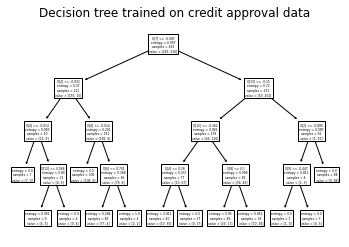

In [34]:
# Output the decision tree
tree.plot_tree(DecTree_final)
plt.title("Decision tree trained on credit approval data")
plt.show()

Outputting the tree, we once again see that feature 7 is important.

Below we investigate which features are the most important in determining the classification

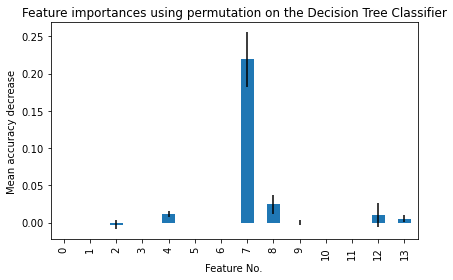

In [35]:
# Note the time taken to take into account complexity of the classifier
start_time = time.time()

result = permutation_importance(DecTree_final, X_test_scaled, y_test, n_repeats=10, random_state=42, n_jobs=2)

DecTree_elapsed_time = time.time() - start_time

# plot accuracy decrease against feature number to determine importance of features for this classifier

DecTree_final_importances = pd.Series(result.importances_mean)

fig, ax = plt.subplots()
DecTree_final_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on the Decision Tree Classifier")
ax.set_ylabel("Mean accuracy decrease")
ax.set_xlabel("Feature No.")
fig.tight_layout()
plt.show()

Here we notice in particular that feature number 7 is the most prominent in deciding whether information is "approved" or "not approved" with feature number 8 also somewhat showcasing some prominence for the Decision Tree Classifier.

# Random Forest Classifier

In [36]:
# Initializing the RandomForestClassifier

RandFor = RandomForestClassifier()

# Initialise parameters

parameters_RandFor = {'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth' : [5,6], 'criterion' :['gini', 'entropy']}

# Find optimal parameters

clf_RandFor = GridSearchCV(RandFor, parameters_RandFor, cv=5)
clf_RandFor.fit(X_train_scaled, y_train)

print()
print("Random Forest Hyperparameter:", clf_RandFor.best_params_)
print("Random Forest Mean cross validated Score of the best estimator:", round(clf_RandFor.best_score_, 4))


Random Forest Hyperparameter: {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 200}
Random Forest Mean cross validated Score of the best estimator: 0.8853


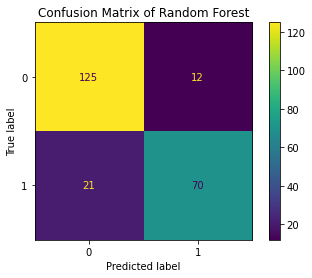

The Random Forest classifier score on the training data is 0.9545
The Random Forest classifier score on the test data is 0.8553


In [37]:
# Set up confusion matrix
RandFor_final = clf_RandFor.best_estimator_
RandFor_final.fit(X_train_scaled, y_train)
RandFor_y_predict_final = RandFor_final.predict(X_test_scaled)

cm_RandFor_final = confusion_matrix(y_test, RandFor_y_predict_final, labels=RandFor_final.classes_)
disp_RandFor = ConfusionMatrixDisplay(confusion_matrix=cm_RandFor_final, display_labels=RandFor_final.classes_)

RandFor_score_train = round(RandFor_final.score(X_train_scaled, y_train), 4)
RandFor_score_test = round(RandFor_final.score(X_test_scaled, y_test), 4)

disp_RandFor.plot()
plt.title("Confusion Matrix of Random Forest")
plt.show()

print("The Random Forest classifier score on the training data is", RandFor_score_train)
print("The Random Forest classifier score on the test data is", RandFor_score_test)

This confusion matrix for the Random Forest classifier shows more false negatives and less false positives

In [38]:
# Produce classification report
print(classification_report(y_test, RandFor_y_predict_final))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       137
           1       0.85      0.77      0.81        91

    accuracy                           0.86       228
   macro avg       0.85      0.84      0.85       228
weighted avg       0.86      0.86      0.85       228



For the classification report of the Random Forest classifier we notice a somewhat low percentage of correct positive predictions relative to total actual positives for "approved" features which indicates the classifier having less true positives.

Below we investigate which features are the most important in determining the classification

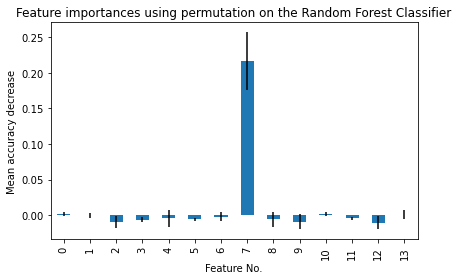

In [39]:
# Note the time taken to take into account complexity of the classifier
start_time = time.time()

result = permutation_importance(RandFor_final, X_test_scaled, y_test, n_repeats=10, random_state=42, n_jobs=2)

RandFor_elapsed_time = time.time() - start_time

# plot accuracy decrease against feature number to determine importance of features for this classifier

RandFor_importances = pd.Series(result.importances_mean)

fig, ax = plt.subplots()
RandFor_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on the Random Forest Classifier")
ax.set_ylabel("Mean accuracy decrease")
ax.set_xlabel("Feature No.")
fig.tight_layout()
plt.show()

Here we notice in particular that feature number 7 is the most prominent in deciding whether information is "approved" or "not approved" for the Random Forest Classifier.

# Radius Neighbors Classifier

Note that although the default radius for using the Radius Neighbors Classifier is 1.0, we can only find optimal parameters for when we use radii larger than 37.0

In [40]:
# Initializing the RadiusNeighborsClassifier
RadNeigh = RadiusNeighborsClassifier()

# Initialise parameters

parameters_RadNeigh = {'radius': [40.0, 50.0, 100.0], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p': [1, 2, 3]}

# Find optimal parameters

clf_RadNeigh = GridSearchCV(RadNeigh, parameters_RadNeigh, cv=5)
clf_RadNeigh.fit(X_train_scaled, y_train)

print("Radius Neighbors Hyperparameter:", clf_RadNeigh.best_params_)
print("Radius Neighbors Mean cross validated score of the best estimator:", round(clf_RadNeigh.best_score_, 4))

Radius Neighbors Hyperparameter: {'algorithm': 'auto', 'p': 1, 'radius': 40.0, 'weights': 'distance'}
Radius Neighbors Mean cross validated score of the best estimator: 0.8029


the Radius Neighbors classifier score on the training data is 1.0
The Radius Neighbors classifier score on the test data is 0.7939


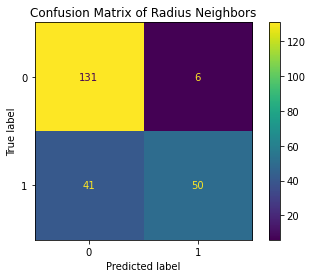

In [41]:
# Set up confusion matrix
RadNeigh_final = clf_RadNeigh.best_estimator_
RadNeigh_final.fit(X_train_scaled, y_train)
RadNeigh_y_predict_final = RadNeigh_final.predict(X_test_scaled)

cm_RadNeigh_final = confusion_matrix(y_test, RadNeigh_y_predict_final, labels=RadNeigh_final.classes_)
disp_RadNeigh = ConfusionMatrixDisplay(confusion_matrix=cm_RadNeigh_final, display_labels=RadNeigh_final.classes_)

RadNeigh_score_train = round(RadNeigh_final.score(X_train_scaled, y_train), 4)
RadNeigh_score_test = round(RadNeigh_final.score(X_test_scaled, y_test), 4)

disp_RadNeigh.plot()
plt.title("Confusion Matrix of Radius Neighbors")
plt.show

print("the Radius Neighbors classifier score on the training data is", RadNeigh_score_train)
print("The Radius Neighbors classifier score on the test data is", RadNeigh_score_test)

We notice that the confusion matrix for the Radius Neighbors classifier has an alarmingly high number false negatives and an alarmingly low number of true positives as well as a low number of false positives.

In [42]:
# Produce classification report
print(classification_report(y_test, RadNeigh_y_predict_final))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85       137
           1       0.89      0.55      0.68        91

    accuracy                           0.79       228
   macro avg       0.83      0.75      0.76       228
weighted avg       0.81      0.79      0.78       228



For the classification report of the Radius Neighbors classifier we see an alarmingly low percentage of correct positive predictions relative to total actual positives and hence this classifier is most likely the worst classifier to use when analyzing credit approval data.

Below we investigate which features are the most important in determining the classification

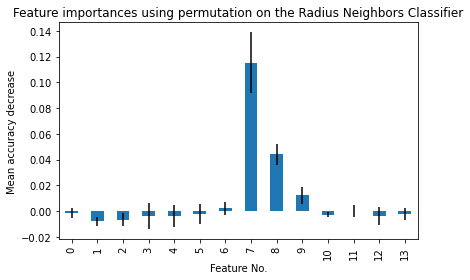

In [43]:
# Note the time taken to take into account complexity of the classifier
start_time = time.time()

result = permutation_importance(RadNeigh_final, X_test_scaled, y_test, n_repeats=10, random_state=42, n_jobs=2)

RadNeigh_elapsed_time = time.time() - start_time

# plot accuracy decrease against feature number to determine importance of features for this classifier

RadNeigh_importances = pd.Series(result.importances_mean)

fig, ax = plt.subplots()
RadNeigh_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on the Radius Neighbors Classifier")
ax.set_ylabel("Mean accuracy decrease")
ax.set_xlabel("Feature No.")
fig.tight_layout()
plt.show()

Here we notice in particular that feature number 7 is the most prominent in deciding whether information is "approved" or "not approved" with feature number 8 also showcasing some prominence for the Radius Neighbors Classifier.

# Gaussian Process Classifier

In [44]:
# Initializing the GaussianProcessClassifier
Gauss = GaussianProcessClassifier()

# Initialise parameters

parameters_Gauss = {'optimizer': ['fmin_l_bfgs_b'], 'max_iter_predict': [75, 100, 125], 'multi_class': ['one_vs_rest', 'one_vs_one']}

# Find optimal parameters

clf_Gauss = GridSearchCV(Gauss, parameters_Gauss, cv=5)
clf_Gauss.fit(X_train_scaled, y_train)

print("Gaussian Process Hyperparameter:", clf_Gauss.best_params_)
print("Gaussian Process Mean cross validated score of the best estimator", round(clf_Gauss.best_score_, 4))

Gaussian Process Hyperparameter: {'max_iter_predict': 75, 'multi_class': 'one_vs_rest', 'optimizer': 'fmin_l_bfgs_b'}
Gaussian Process Mean cross validated score of the best estimator 0.8506


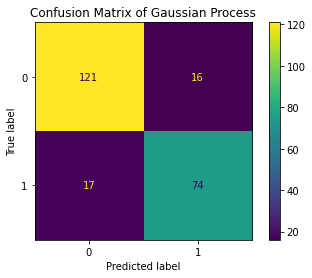

The Gaussian Process classifier score on the training data is 0.9719
The Gaussian Process classifier score on the test data is 0.8553


In [45]:
# Set up confusion matrix
Gauss_final = clf_Gauss.best_estimator_
Gauss_final.fit(X_train_scaled, y_train)
Gauss_y_predict_final = Gauss_final.predict(X_test_scaled)

cm_Gauss_final = confusion_matrix(y_test, Gauss_y_predict_final, labels=Gauss_final.classes_)
disp_Gauss = ConfusionMatrixDisplay(confusion_matrix=cm_Gauss_final, display_labels=Gauss_final.classes_)

Gauss_score_train = round(Gauss_final.score(X_train_scaled, y_train), 4)
Gauss_score_test = round(Gauss_final.score(X_test_scaled, y_test), 4)

disp_Gauss.plot()
plt.title("Confusion Matrix of Gaussian Process")
plt.show()

print("The Gaussian Process classifier score on the training data is", Gauss_score_train)
print("The Gaussian Process classifier score on the test data is", Gauss_score_test)

We note that this confusion matrix is almost the same as the confusion matrix for the SVC classifier with default parameters as well the Gaussian process classifier having a very high score on training test data.

In [46]:
# Produce classification report
print(classification_report(y_test, Gauss_y_predict_final))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       137
           1       0.82      0.81      0.82        91

    accuracy                           0.86       228
   macro avg       0.85      0.85      0.85       228
weighted avg       0.86      0.86      0.86       228



The classification report of the Gaussian Process Classifier shows somewhat high percentages of precision for "not approved" and a little lower percentages for "approved" meaning that there are slightly more false positives than false negatives.

Below we investigate which features are the most important in determining the classification

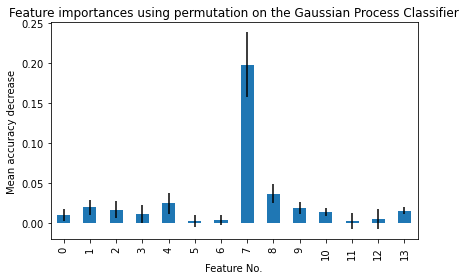

In [47]:
# Note the time taken to take into account complexity of the classifier
start_time = time.time()

result = permutation_importance(Gauss_final, X_test_scaled, y_test, n_repeats=10, random_state=42, n_jobs=2)

Gauss_elapsed_time = time.time() - start_time

# plot accuracy decrease against feature number to determine importance of features for this classifier

Gauss_importances = pd.Series(result.importances_mean)

fig, ax = plt.subplots()
Gauss_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on the Gaussian Process Classifier")
ax.set_ylabel("Mean accuracy decrease")
ax.set_xlabel("Feature No.")
fig.tight_layout()
plt.show()

Here we notice in particular that feature number 7 is the most prominent in deciding whether information is "approved" or "not approved" with feature number 8 also somewhat showcasing some prominence for the Gaussian Process Classifier.

We now compare each classifier score on the test data

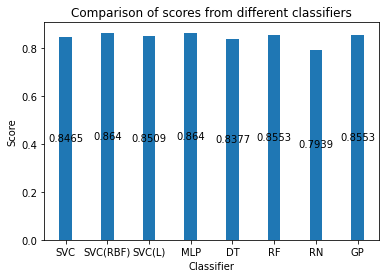

In [48]:
# Plot classifier score on the test data for each classifier
names = ['SVC', 'SVC(RBF)', 'SVC(L)', 'MLP', 'DT', 'RF', 'RN', 'GP']
train_results = [score_default_train, score_rbf_train, score_linear_train, mlp_score_train, DecTree_score_train, RandFor_score_train, RadNeigh_score_train, Gauss_score_train]
test_results = [score_default_test, score_rbf_test, score_linear_test, mlp_score_test, DecTree_score_test, RandFor_score_test, RadNeigh_score_test, Gauss_score_test]

fig, ax = plt.subplots()

p1 = ax.bar(names, test_results, width = 0.3)

ax.bar_label(p1, label_type='center')
ax.set_xticks(names)
ax.set_xlabel("Classifier")
ax.set_ylabel("Score")
ax.set_title("Comparison of scores from different classifiers")
plt.show()

Overall, we see that the MLP Classifier has the highest score on the test data while the Radius Neighbors Classifier had the lowest. The rest of the classifiers have similar scores to eachother and hence it would be hard to differentiate from them on how useful they are on analyzing credit approval data.

Below we analyze the time taken for each classifier

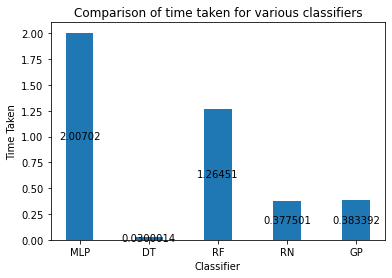

In [49]:
# Plot times taken for determining permutation importance for each classifier
names = ['MLP', 'DT', 'RF', 'RN', 'GP']
time_results = [mlp_elapsed_time, DecTree_elapsed_time, RandFor_elapsed_time, RadNeigh_elapsed_time, Gauss_elapsed_time]

fig, ax = plt.subplots()

p1 = ax.bar(names, time_results, width=0.4,)

ax.bar_label(p1, label_type='center')
ax.set_xticks(names)
ax.set_xlabel("Classifier")
ax.set_ylabel("Time Taken")
ax.set_title("Comparison of time taken for various classifiers")
plt.show()

From this bar chart we see that the MLP classifier has the highest computational complexity while the Decision Tree classifier has by far the lowest computational complexity as indicated by the time taken for the permutation_importance function. Radius Neighbors and Gaussian Process classifiers also have relatively low computational complexity.

# Conclusions

In this notebook we investigated the importance of various features for credit approval data as well as which classifiers would be the best to use to analyze credit approval data. 

We see that overall, feature 7 is by far the most prominent feature in determining whether credit card approval information is determined to be "approved" or "not approved". We also see some evidence that feature 8 also has some prominence in determining whether credit card approval information is determined to be "approved" or "not approved".

Furthermore, we see that the MLP classifier has the highest classifier score on the test data. However, we also notice that the MLP classifier has the highest computational complexity as well as a higher number of false positives than the Random Forest classifier. Hence we argue that the Random Forest classifier is most suited to analyzing credit approval data as the precision of predicting 1 and the recall of predicting 0 are especially important. Our evidence for this is a recall of 93% for preditcing 0 for the Random Forest classifier as well as high precision of predicting 1 as evidenced by its classification report.

By this same logic, we can also argue that the Gaussian Process classifier and the Decision Tree Classifier are a good classifiers to use for analyzing credit approval data as they have similar results to the Random Forest classifier in their classification reports as well as also having a lower computational complexity.